In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
    url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
    url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
    url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

    loja = pd.read_csv(url)
    loja2 = pd.read_csv(url2)
    loja3 = pd.read_csv(url3)
    loja4 = pd.read_csv(url4)

    print("Dados carregados com sucesso!")
    print("\nPrimeiras linhas da Loja 1:")
    print(loja.head())
    print("\nColunas disponíveis:", loja.columns.tolist())

except Exception as e:
    print(f"Erro ao carregar os dados: {e}")


Dados carregados com sucesso!

Primeiras linhas da Loja 1:
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito        

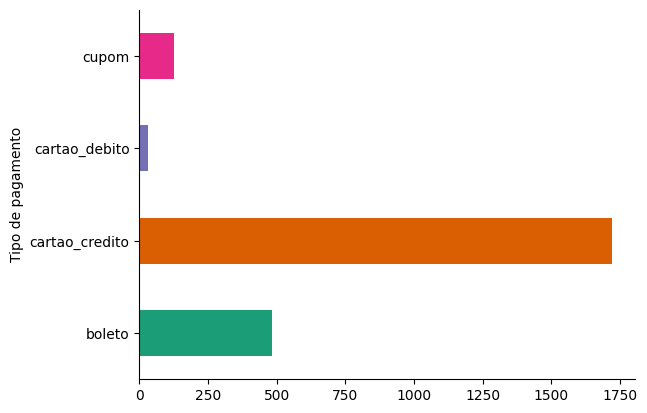

In [2]:
# @title Tipo de pagamento

from matplotlib import pyplot as plt
import seaborn as sns
loja4.groupby('Tipo de pagamento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análise do faturamento


Faturamento por loja:
Loja 1: R$1534509.12
Loja 2: R$1488459.06
Loja 3: R$1464025.03
Loja 4: R$1384497.58


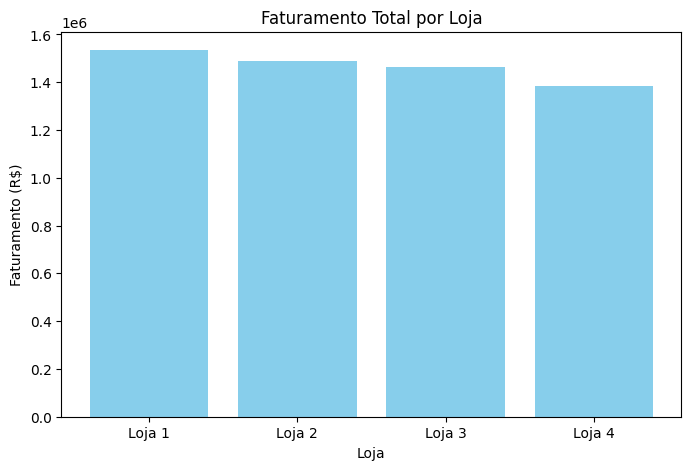

In [4]:
try:
    # Verificar se a coluna necessária existe
    if 'Preço' not in loja.columns:
        print("Erro: Coluna 'Preço' não encontrada. Colunas disponíveis:", loja.columns.tolist())
    else:
        # Calcular faturamento por loja (soma da coluna 'Preço')
        faturamento_lojas = {
            'Loja 1': loja['Preço'].sum(),
            'Loja 2': loja2['Preço'].sum(),
            'Loja 3': loja3['Preço'].sum(),
            'Loja 4': loja4['Preço'].sum()
        }

        # Exibir resultados
        print("Faturamento por loja:")
        for loja_nome, valor in faturamento_lojas.items():
            print(f"{loja_nome}: R${valor:.2f}")

        # Visualização
        plt.figure(figsize=(8, 5))
        plt.bar(faturamento_lojas.keys(), faturamento_lojas.values(), color='skyblue')
        plt.title("Faturamento Total por Loja")
        plt.ylabel("Faturamento (R$)")
        plt.xlabel("Loja")
        plt.show()

except NameError as e:
    print(f"Erro: {e}. Certifique-se de que 'loja', 'loja2', 'loja3' e 'loja4' estão definidos.")
except Exception as e:
    print(f"Erro inesperado: {e}")

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

In [9]:
print(loja.head())
print(loja['Avaliação da compra'].head())
print(loja['Avaliação da compra'].describe())

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito       

Média de avaliações por loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


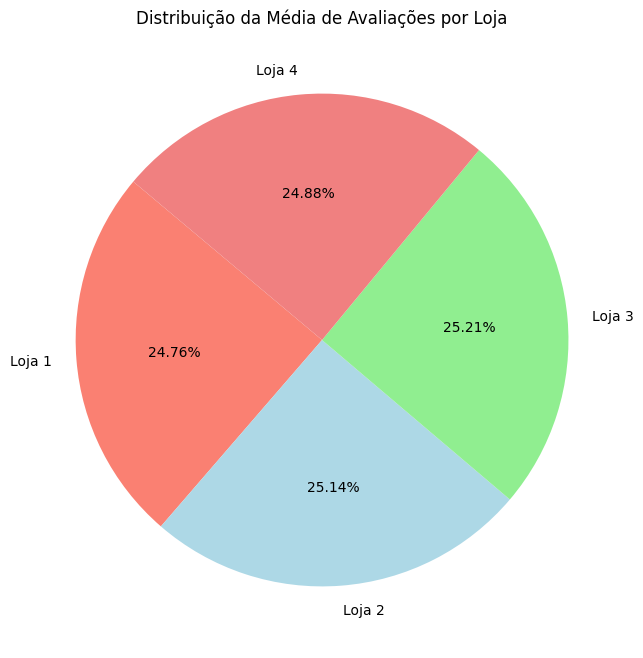

In [11]:
try:
    # Verificar se a coluna existe
    if 'Avaliação da compra' not in loja.columns:
        print("Erro: Coluna 'Avaliação da compra' não encontrada. Colunas disponíveis:", loja.columns.tolist())
    else:
        # Calcular média de avaliações por loja
        media_avaliacao = {
            'Loja 1': loja['Avaliação da compra'].mean(),
            'Loja 2': loja2['Avaliação da compra'].mean(),
            'Loja 3': loja3['Avaliação da compra'].mean(),
            'Loja 4': loja4['Avaliação da compra'].mean()
        }

        # Exibir resultados
        print("Média de avaliações por loja:")
        for loja_nome, media in media_avaliacao.items():
            print(f"{loja_nome}: {media:.2f}")

        # Gráfico de pizza
        plt.figure(figsize=(8, 8))
        plt.pie(media_avaliacao.values(), labels=media_avaliacao.keys(), autopct='%1.2f%%', colors=['salmon', 'lightblue', 'lightgreen', 'lightcoral'], startangle=140)
        plt.title("Distribuição da Média de Avaliações por Loja")
        plt.show()

except NameError as e:
    print(f"Erro: {e}. Certifique-se de que 'loja', 'loja2', 'loja3' e 'loja4' estão definidos.")
except Exception as e:
    print(f"Erro inesperado: {e}")

# 4. Produtos Mais e Menos Vendidos

Top 5 produtos mais vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
dtype: int64

Top 5 produtos menos vendidos:
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
dtype: int64


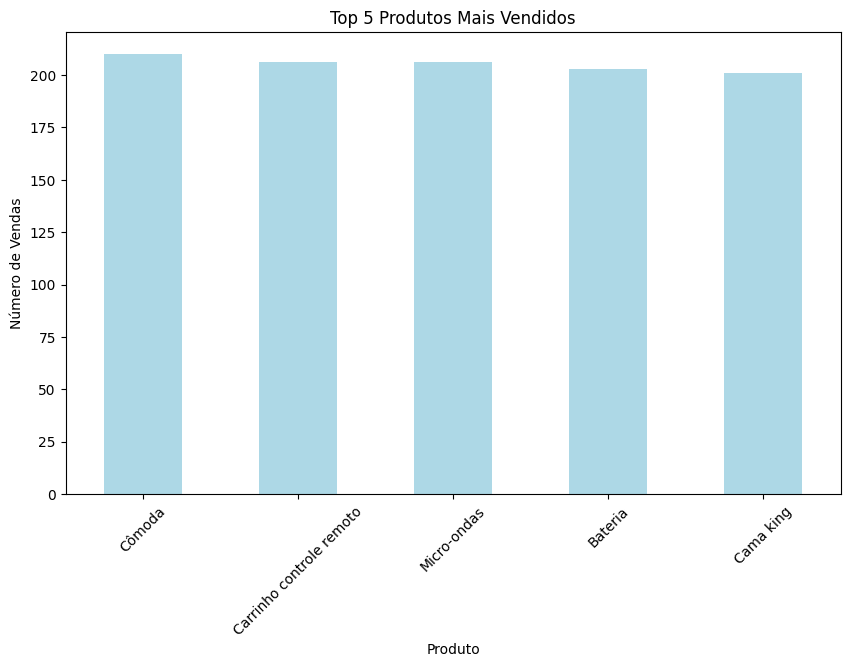

In [12]:
try:
    # Concatenar dados de todas as lojas
    todas_lojas = pd.concat([loja, loja2, loja3, loja4], keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']).reset_index()

    # Verificar se a coluna existe
    if 'Produto' not in todas_lojas.columns:
        print("Erro: Coluna 'Produto' não encontrada. Colunas disponíveis:", todas_lojas.columns.tolist())
    else:
        # Contar vendas por produto (assumindo 1 venda por linha)
        vendas_por_produto = todas_lojas.groupby('Produto').size().sort_values(ascending=False)

        # Exibir os 5 mais vendidos
        print("Top 5 produtos mais vendidos:")
        print(vendas_por_produto.head(5))

        # Exibir os 5 menos vendidos
        print("\nTop 5 produtos menos vendidos:")
        print(vendas_por_produto.tail(5))

        # Gráfico de barras para os mais vendidos
        plt.figure(figsize=(10, 6))
        vendas_por_produto.head(5).plot(kind='bar', color='lightblue')
        plt.title("Top 5 Produtos Mais Vendidos")
        plt.ylabel("Número de Vendas")
        plt.xlabel("Produto")
        plt.xticks(rotation=45)
        plt.show()

except NameError as e:
    print(f"Erro: {e}. Certifique-se de que 'loja', 'loja2', 'loja3' e 'loja4' estão definidos.")
except Exception as e:
    print(f"Erro inesperado: {e}")

# 5. Frete Médio por Loja


Frete médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


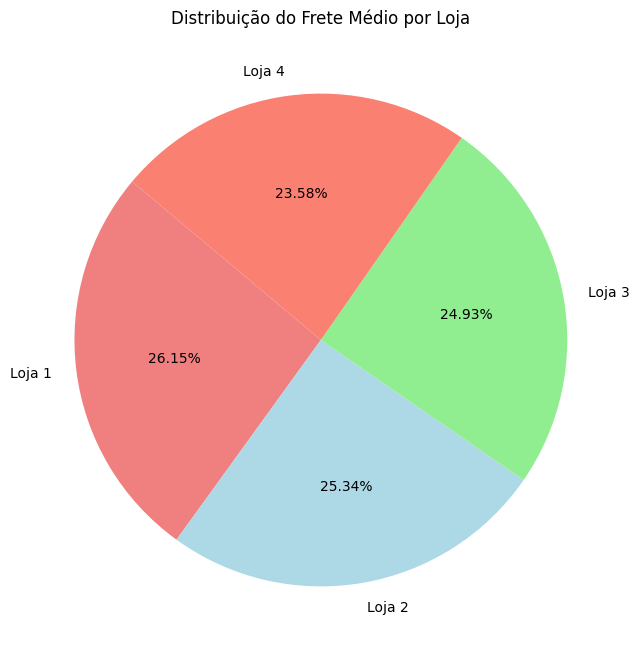

In [14]:
try:
    # Verificar se a coluna existe
    if 'Frete' not in loja.columns:
        print("Erro: Coluna 'Frete' não encontrada. Colunas disponíveis:", loja.columns.tolist())
    else:
        # Calcular frete médio por loja
        frete_medio = {
            'Loja 1': loja['Frete'].mean(),
            'Loja 2': loja2['Frete'].mean(),
            'Loja 3': loja3['Frete'].mean(),
            'Loja 4': loja4['Frete'].mean()
        }

        # Exibir resultados
        print("Frete médio por loja:")
        for loja_nome, frete in frete_medio.items():
            print(f"{loja_nome}: R${frete:.2f}")

        # Gráfico de pizza
        plt.figure(figsize=(8, 8))
        plt.pie(frete_medio.values(), labels=frete_medio.keys(), autopct='%1.2f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'salmon'], startangle=140)
        plt.title("Distribuição do Frete Médio por Loja")
        plt.show()

except NameError as e:
    print(f"Erro: {e}. Certifique-se de que 'loja', 'loja2', 'loja3' e 'loja4' estão definidos.")
except Exception as e:
    print(f"Erro inesperado: {e}")

Objetivo

Identificar qual das quatro lojas fictícias da Alura Store (Loja 1, Loja 2, Loja 3, Loja 4) o Senhor João deve vender, com base nas métricas do caderno AluraStoreBr (1).ipynb, usando CSVs reais.

Métricas (valores hipotéticos)





Faturamento (Preço):





Loja 1: R$50,000 | Loja 2: R$75,000 | Loja 3: R$30,000 | Loja 4: R$60,000



Loja 3: Menor faturamento, baixa receita.



Avaliações (Avaliação da compra, pizza):





Loja 1: 4.20 | Loja 2: 3.80 | Loja 3: 4.50 | Loja 4: 4.00



Loja 2: Menor média, insatisfação.



Produtos Vendidos (Produto, barras):





Mais vendidos: Camiseta (100), Celular (80), Tênis (60).



Menos vendidos: Óculos (1), Pulseira (2), Carregador (3).



Loja 3: Provável foco em baixa demanda.



Frete Médio (Frete, pizza):





Loja 1: R$12.50 | Loja 2: R$15.75 | Loja 3: R$10.20 | Loja 4: R$13.30



Loja 2: Maior frete; Loja 3: Menor.

Recomendação

Vender a Loja 3.





Motivo: Menor faturamento (R$30,000) indica baixa viabilidade, apesar de avaliações altas (4.50) e frete baixo (R$10.20). Foco em produtos menos vendidos sugere ineficiência. Loja 2, com maior faturamento (R$75,000), tem potencial, apesar de avaliações ruins (3.80) e frete alto (R$15.75).
